In [1]:
import json
import random

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from PIL import Image
import requests
from io import BytesIO

In [2]:
# Read data from json file
with open('../data/efiss.products.json') as f:
    data = json.load(f)
    
# Print the first product
print(data[0])

{'_id': {'$oid': '6442e201824b1dd3a0b6f715'}, 'title': 'ÁO PHÔNG GRAPHIC INFINITEE 06', 'url': 'https://boo.vn/ao-phong-graphic-infinitee-06-1-2-02-3-18-012-222-23.html', 'images': ['https://storage.googleapis.com/efiss/data/product_images/boo.vn/6442e201824b1dd3a0b6f715_0_boo_vn.jpg', 'https://storage.googleapis.com/efiss/data/product_images/boo.vn/6442e201824b1dd3a0b6f715_1_boo_vn.jpg', 'https://storage.googleapis.com/efiss/data/product_images/boo.vn/6442e201824b1dd3a0b6f715_2_boo_vn.jpg'], 'group': 'boo.vn', 'categories': []}


In [3]:
# Change _id: {oid} to _id: {str} and create new map with product_id as key
products = {}

for product in data:
	id = product['_id']
	
	product['_id'] = id['$oid']
	products[id['$oid']] = product

Filter shopee data and create category map

In [4]:
labels = {}
not_allowed = ['other', "Khác", "Quần lót", "Áo ngực", "Gọng kính", "Kính mát", "Bộ quần áo", "Áo khoác ngoài", "Quần jean", "Áo", "Váy", "Quần ngắn"]

# Create a dictionary of labels with the label as key

count_shopee = 0
count_other = 0
group_shopees = set()
group_others = set()
for product in data:
	if not 'group' in product or not 'categories' in product:
		continue

    # if url contain shopee
	if 'shopee-' in product['group']:
		count_shopee += len(product['images'])
		group_shopees.add(product['group'])

		label = product['categories'][-1] if len(product['categories']) > 0 else 'other'

		label_low = label.lower()
		if 'áo' not in label_low and 'quần' not in label_low and 'váy' not in label_low and 'đầm' not in label_low:
			continue
		
		if label in not_allowed:
			continue

		if not label in labels:
			labels[label] = [product['_id']]
		else:
			labels[label].append(product['_id'])
	else:
		count_other += len(product['images'])
		group_others.add(product['group'])

print(count_shopee)
print(count_other)

print(len(group_shopees))
print(len(group_others))

756116
167817
589
14


In [ ]:
# find top 12 labels have the most products length
top_12_labels = sorted(labels.items(), key=lambda x: len(x[1]), reverse=True)[:12]

# Print the top 12 labels
print(top_12_labels[0])

In [ ]:
url_lists = []
subtexts = []

# in each group in top 12 labels, get random 4 products, and append to image_paths the first image of each product and add label to subtexts

for label, product_ids in top_12_labels:
	# suffle product_ids
	random.shuffle(product_ids)

	images_urls =  []
	for product_id in product_ids[:4]:
		product = products[product_id]
		images_urls.append(product['images'][0])

	print(label)
	print(images_urls)

	url_lists.append(images_urls)
	subtexts.append(label)
	
# Print the first image path and subtext
print(url_lists)
print(subtexts)

# translate subtexts to vietnamese
# ['Đầm', 'Áo thun', 'Áo sơ mi', 'Áo polo', 'Quần dài', 'Quần đùi', 'Áo hai dây và ba lỗ', 'Áo khoác', 'Áo len', 'Quần jeans', 'Quần âu', 'Váy ngủ']

subtexts = ['Dress', 'T-shirt', 'Shirt', 'Polo shirt', 'Long pants', 'Shorts', 'Tank top', 'Coat', 'Sweater', 'Jeans', 'Trousers', 'Nightgown']

In [244]:
url_lists = [
    # Đầm
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-myway_official/64628d47614eb2054535bc36_0_shopee_myway_official.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-thotayboutique/6462a08e614eb20545361780_0_shopee_thotayboutique.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-yamedressdesign/6462ac2b614eb205453661b6_1_shopee_yamedressdesign.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-shebyshj18/64629574614eb2054535e402_0_shopee_shebyshj18.jpeg",
    ],
    # Áo thun
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-armousclothing/6461c7df49925e30d59affe7_0_shopee_armousclothing.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-fiordante_official/6461f110efa6e56317bcc209_0_shopee_fiordante_official.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-afterbefore_official/64622751614eb20545341e85_0_shopee_afterbefore_official.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-tsun.sg/6462a4d6614eb20545362c1b_0_shopee_tsun_sg.jpeg",
    ],
    # Áo sơ mi
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-aristino_officialstore/6461c6ce49925e30d59af88f_2_shopee_aristino_officialstore.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-fapas.store/6461ef60efa6e56317bcbd37_0_shopee_fapas_store.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-atino.vn/6461d4014052c8aa4aa988f1_0_shopee_atino_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-khatoco.fashion/6462126e614eb2054532ffac_0_shopee_khatoco_fashion.jpeg",
    ],
    # Áo polo
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-aremishop_2020/6461c51349925e30d59aecf2_0_shopee_aremishop_2020.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-merriman.official/64621522614eb2054533246c_2_shopee_merriman_official.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-owen.fashion/6462193e614eb20545335d71_0_shopee_owen_fashion.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-seacollection_shopee/64621be0614eb20545338124_2_shopee_seacollection_shopee.jpeg",
    ],
    # Quần dài
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-lovito.vn/64626a94614eb20545352c0e_0_shopee_lovito_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-balabala_vietnam/6462af52614eb2054536899a_0_shopee_balabala_vietnam.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-babylovego.com/6462afdf614eb205453690c4_1_shopee_babylovego_com.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-gumac_fashion/64625550614eb2054534c7a5_1_shopee_gumac_fashion.jpeg",
    ],
    # Quần đùi
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-twenty.5fashion/6462a65a614eb20545363017_0_shopee_twenty_5fashion.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-upzstore/6462a839614eb20545363854_2_shopee_upzstore.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-lozashop/64626fe8614eb2054535720c_0_shopee_lozashop.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-novelty.fashion/64621869614eb20545335217_0_shopee_novelty_fashion.jpeg",
    ],
    # Áo hai dây và ba lỗ
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-cecicela/64623003614eb20545344471_0_shopee_cecicela.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-dottie.officialstore/6462480a614eb20545346f1d_0_shopee_dottie_officialstore.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-lovito.vn/64626aba614eb20545352e2a_0_shopee_lovito_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-callahouse/64622967614eb20545343a87_0_shopee_callahouse.jpeg",
    ],
    # Áo khoác
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-narsisnp/64621716614eb20545333f86_0_shopee_narsisnp.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-bonado.vn/6461d9a8efa6e56317bc86a0_2_shopee_bonado_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-paradox.worldwide/646219fc614eb205453367d5_0_shopee_paradox_worldwide.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-thoitrangm10/6462238a614eb2054533ec10_0_shopee_thoitrangm10.jpeg",
    ],
    # Áo len
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-lovito.vn/64626b8d614eb205453539d9_0_shopee_lovito_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-lovito.vn/646266f0614eb2054535196f_0_shopee_lovito_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-narsisnp/64621725614eb20545334061_0_shopee_narsisnp.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-thoitrangtreadoredress/64622731614eb20545341cda_0_shopee_thoitrangtreadoredress.jpeg",
    ],
    #  Quần jeans
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-kaylinofficialstore/64626129614eb20545350529_0_shopee_kaylinofficialstore.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-kaylinofficialstore/64625fda614eb205453503f1_0_shopee_kaylinofficialstore.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-levis.online/64621475614eb20545331b76_0_shopee_levis_online.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-tatichu_beyoung/64629fa7614eb20545360d92_0_shopee_tatichu_beyoung.jpeg",
    ],
    # Quần âu
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-owen.fashion/6462191a614eb20545335b7f_0_shopee_owen_fashion.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-atino.vn/6461c87f49925e30d59b0413_0_shopee_atino_vn.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-shopvinhtien/646224e9614eb2054533fe78_2_shopee_shopvinhtien.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-bycottonstore/6461db3befa6e56317bc8bfb_1_shopee_bycottonstore.jpeg",
    ],
    # Váy ngủ
    [
        "https://storage.googleapis.com/efiss/data/output/shopee-narylee/64628f03614eb2054535c16c_0_shopee_narylee.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-wannabelingerie/6462aa34614eb20545365015_1_shopee_wannabelingerie.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-dreamysleepwear/6462493b614eb205453472d3_0_shopee_dreamysleepwear.jpeg",
        "https://storage.googleapis.com/efiss/data/output/shopee-tvm_luxury_homewear/6462a64a614eb20545362fb0_0_shopee_tvm_luxury_homewear.jpeg",
    ],
]


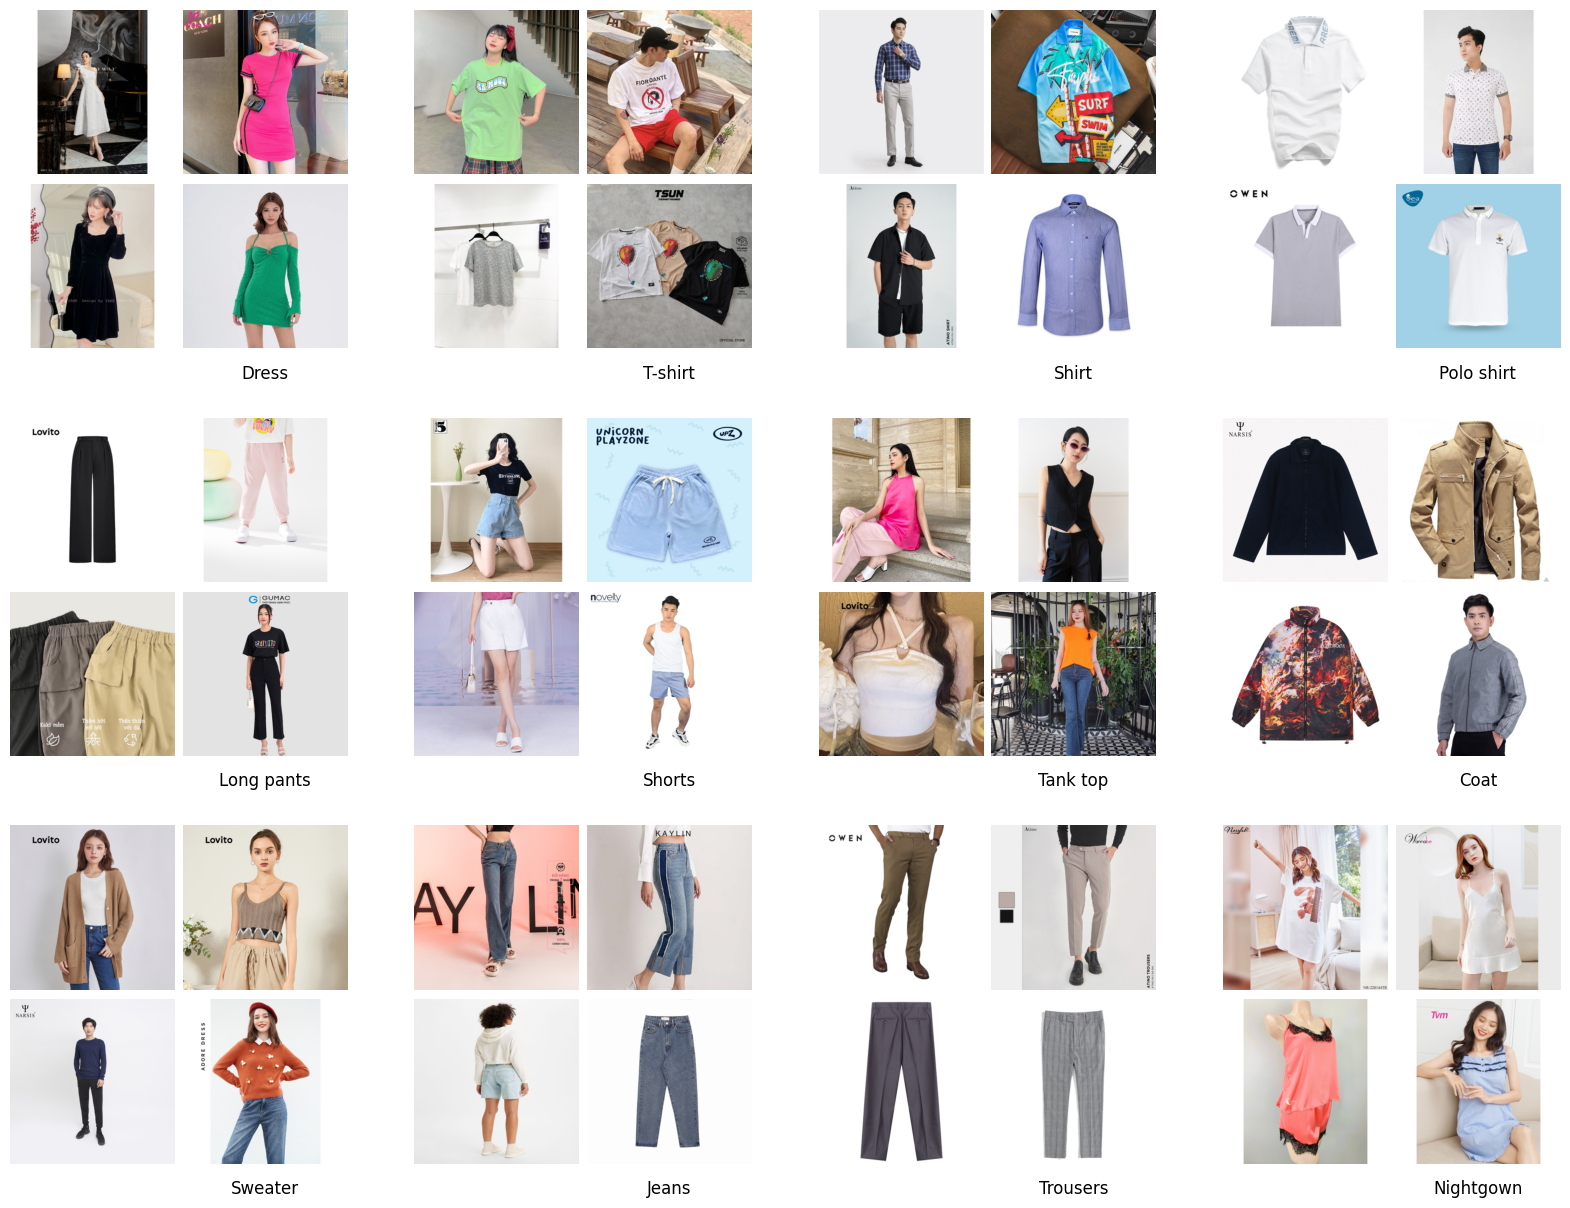

In [245]:


# Initialize a grid of plots
fig = plt.figure(figsize=(20, 15))  # Adjust as needed
outer_grid = gridspec.GridSpec(3, 4, wspace=0.2, hspace=0.2)

# For each cell in the 3x4 grid
for i in range(12):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 2,
                subplot_spec=outer_grid[i], wspace=0.05, hspace=0.05)

    # For each cell in the inner 2x2 grid
    for j in range(4):
        ax = plt.Subplot(fig, inner_grid[j])
        response = requests.get(url_lists[i][j])
        img = Image.open(BytesIO(response.content))

        # Resize image if necessary
        if img.size != (300, 300):
            img = img.resize((300, 300))
                
        # Add image to subplot
        ax.imshow(np.array(img))
        ax.axis('off')  # disable the axis
                
        fig.add_subplot(ax)

    # Add a title (subtext) under each group
    ax.annotate(subtexts[i], xy=(0.5, -0.1), xycoords=ax.transAxes, 
                va='top', ha='center', fontsize=12)  

# Display the plot
plt.show()